# TP 1 : Análisis Exploratorio



In [219]:
# Importamos librerias para generar las visualizaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [220]:
tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [221]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [222]:
# Cantidad de tweets en el dataset
len(tweets)

7613

In [223]:
# Descartamos los tweets sin location definida
tweets = tweets.loc[pd.notna(tweets.location) & pd.notnull(tweets.location)]
# Reemplazamos el string "%20" por el caracter " " en las keywords
tweets['keyword'] = tweets['keyword'].replace(to_replace="%20", value=" ", regex=True)
# Contamos las ocurrencias de cada una en todo el DataFrame
tweets['keyword'].value_counts()

collision              36
whirlwind              33
armageddon             32
fatalities             32
derailed               31
sandstorm              31
flames                 31
outbreak               31
emergency plan         31
desolation             30
harm                   30
earthquake             30
inundated              30
danger                 30
upheaval               30
damage                 30
flood                  29
buildings on fire      29
rainstorm              29
airplane accident      29
collapse               29
weapons                29
displaced              29
flattened              29
ablaze                 29
sinkhole               29
evacuation             29
deluge                 29
drought                28
attacked               28
ruin                   28
demolish               28
burning buildings      28
weapon                 28
wreckage               28
arsonist               28
bioterror              28
accident               28
flooding    

In [224]:
# Obtenemos categorías para las keywords agrupando términos similares (que hacen referencia a lo mismo)
tweets['keyword_category'] = tweets['keyword']
keyword_category_tweets = tweets
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword']
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'annihilation' if 'annihilat' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'arson' if 'arson' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'attack' if 'attack' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'bioterrorism' if 'bioterror' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'blaze' if 'blaz' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'blood' if 'bleeding' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'blood' if 'bloody' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'blew up' if 'blown up' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'body bag' if 'body bag' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'buildings on fire' if 'buildings' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'burning' if 'burned' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'casualty' if 'casualties' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'catastrophe' if 'catastrop' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'collapse' if 'collapsed' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'collision' if 'collide' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'crash' if 'crashed' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'crush' if 'crushed' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'death' if 'dead' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'death' if 'deaths' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'deluge' if 'deluge' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'demolition' if 'demolish' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'derailment' if 'derail' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'desolation' if 'desolate' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'destruction' if 'destroy' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'detonation' if 'detonat' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'devastation' if 'devastat' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'drowning' if 'drown' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'electrocute' if 'electrocute' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'evacuation' if 'evacuat' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'explosion' if 'explode' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'fatality' if 'fatal' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'flood' if 'flood' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'forest fire' if 'forest fire' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'hail' if 'hailstorm' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'hazard' if 'hazard' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'hijacking' if 'hijack' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'hostage' if 'hostage' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'injury' if 'injur' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'inundation' if 'inundated' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'mass murder' if 'mass murder' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'obliteration' if 'obliterate' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'panic' if 'panic' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'quarantine' if 'quarantine' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'rescue' if 'rescue' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'riot' if 'riot' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'screaming' if 'scream' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'siren' if 'siren' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'suicide bomb' if 'suicide bomb' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'bomb' if (x=='bomb')|(x=='bombed')|(x=='bombing') else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'sinking' if 'sunk' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'survive' if 'surviv' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'terrorism' if 'terrorist' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'thunder' if 'thunder' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'trauma' if 'trauma' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'weapon' if 'weapon' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'wildfire' if 'wild fire' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'wounded' if 'wound' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'wreckage' if 'wreck' in x else x)
tweets = keyword_category_tweets
tweets['keyword_category'].value_counts()

collision              90
derailment             83
buildings on fire      82
fatality               82
flood                  81
evacuation             80
wreckage               77
injury                 74
blaze                  74
screaming              73
death                  71
demolition             70
obliteration           69
blood                  68
body bag               68
destruction            68
drowning               67
bomb                   61
rescue                 60
survive                60
hijacking              60
explosion              59
weapon                 57
collapse               55
wounded                54
attack                 53
suicide bomb           53
siren                  51
hail                   51
arson                  50
sinking                49
mass murder            47
desolation             47
casualty               47
blew up                47
panic                  47
devastation            45
riot                   45
wildfire    

In [225]:
tweets['keyword_category'].value_counts().sort_index(ascending=True)

accident               28
aftershock             25
airplane accident      29
ambulance              26
annihilation           38
apocalypse             17
armageddon             32
army                   15
arson                  50
attack                 53
avalanche              23
battle                 19
bioterrorism           39
blaze                  74
blew up                47
blight                 26
blizzard               19
blood                  68
body bag               68
bomb                   61
bridge collapse        20
buildings on fire      82
burning                41
bush fires             17
casualty               47
catastrophe            42
chemical emergency     26
cliff fall             25
collapse               55
collision              90
crash                  38
crush                  42
curfew                 26
cyclone                21
damage                 30
danger                 30
death                  71
debris                 22
deluge      

In [226]:
print ('Cantidad de keywords distintas:', tweets['keyword'].value_counts().count())
print ('Cantidad de categorías de keywords distintas:', tweets['keyword_category'].value_counts().count())

Cantidad de keywords distintas: 221
Cantidad de categorías de keywords distintas: 142


Text(0, 0.5, 'Categoría de keyword')

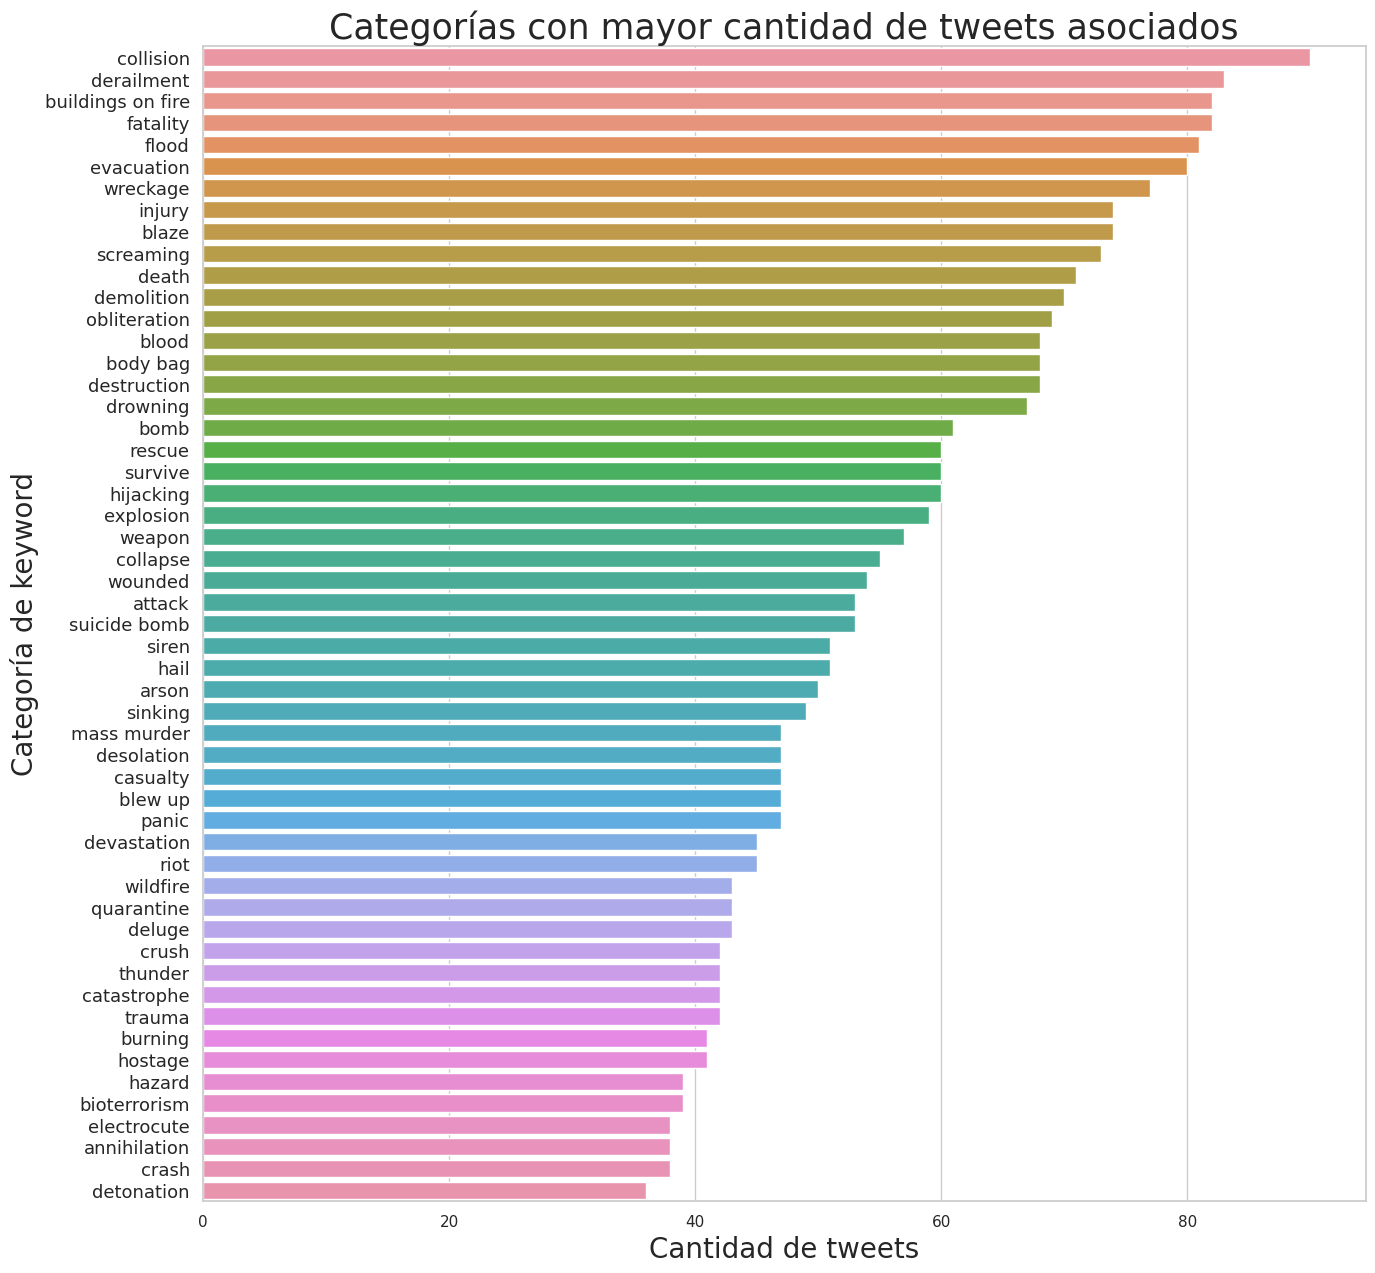

In [227]:
# Categorías con mayor cantidad de tweets asociados
# Consideramos aquellas que tienen una cantidad de tweets superior al promedio general de tweets por categoría

main_keyword_categories_count = tweets['keyword_category'].value_counts()
main_keyword_categories_count = \
main_keyword_categories_count[main_keyword_categories_count > main_keyword_categories_count.mean()]
plt.figure(figsize=(15,15))
plt.yticks(fontsize=13)

main_keyword_categories_count_plot = sns.barplot(x=main_keyword_categories_count.values, \
                                                 y=main_keyword_categories_count.index, orient='h')
main_keyword_categories_count_plot.set_title("Categorías con mayor cantidad de tweets asociados", fontsize=25)
main_keyword_categories_count_plot.set_xlabel("Cantidad de tweets", fontsize=20)
main_keyword_categories_count_plot.set_ylabel("Categoría de keyword", fontsize=20)


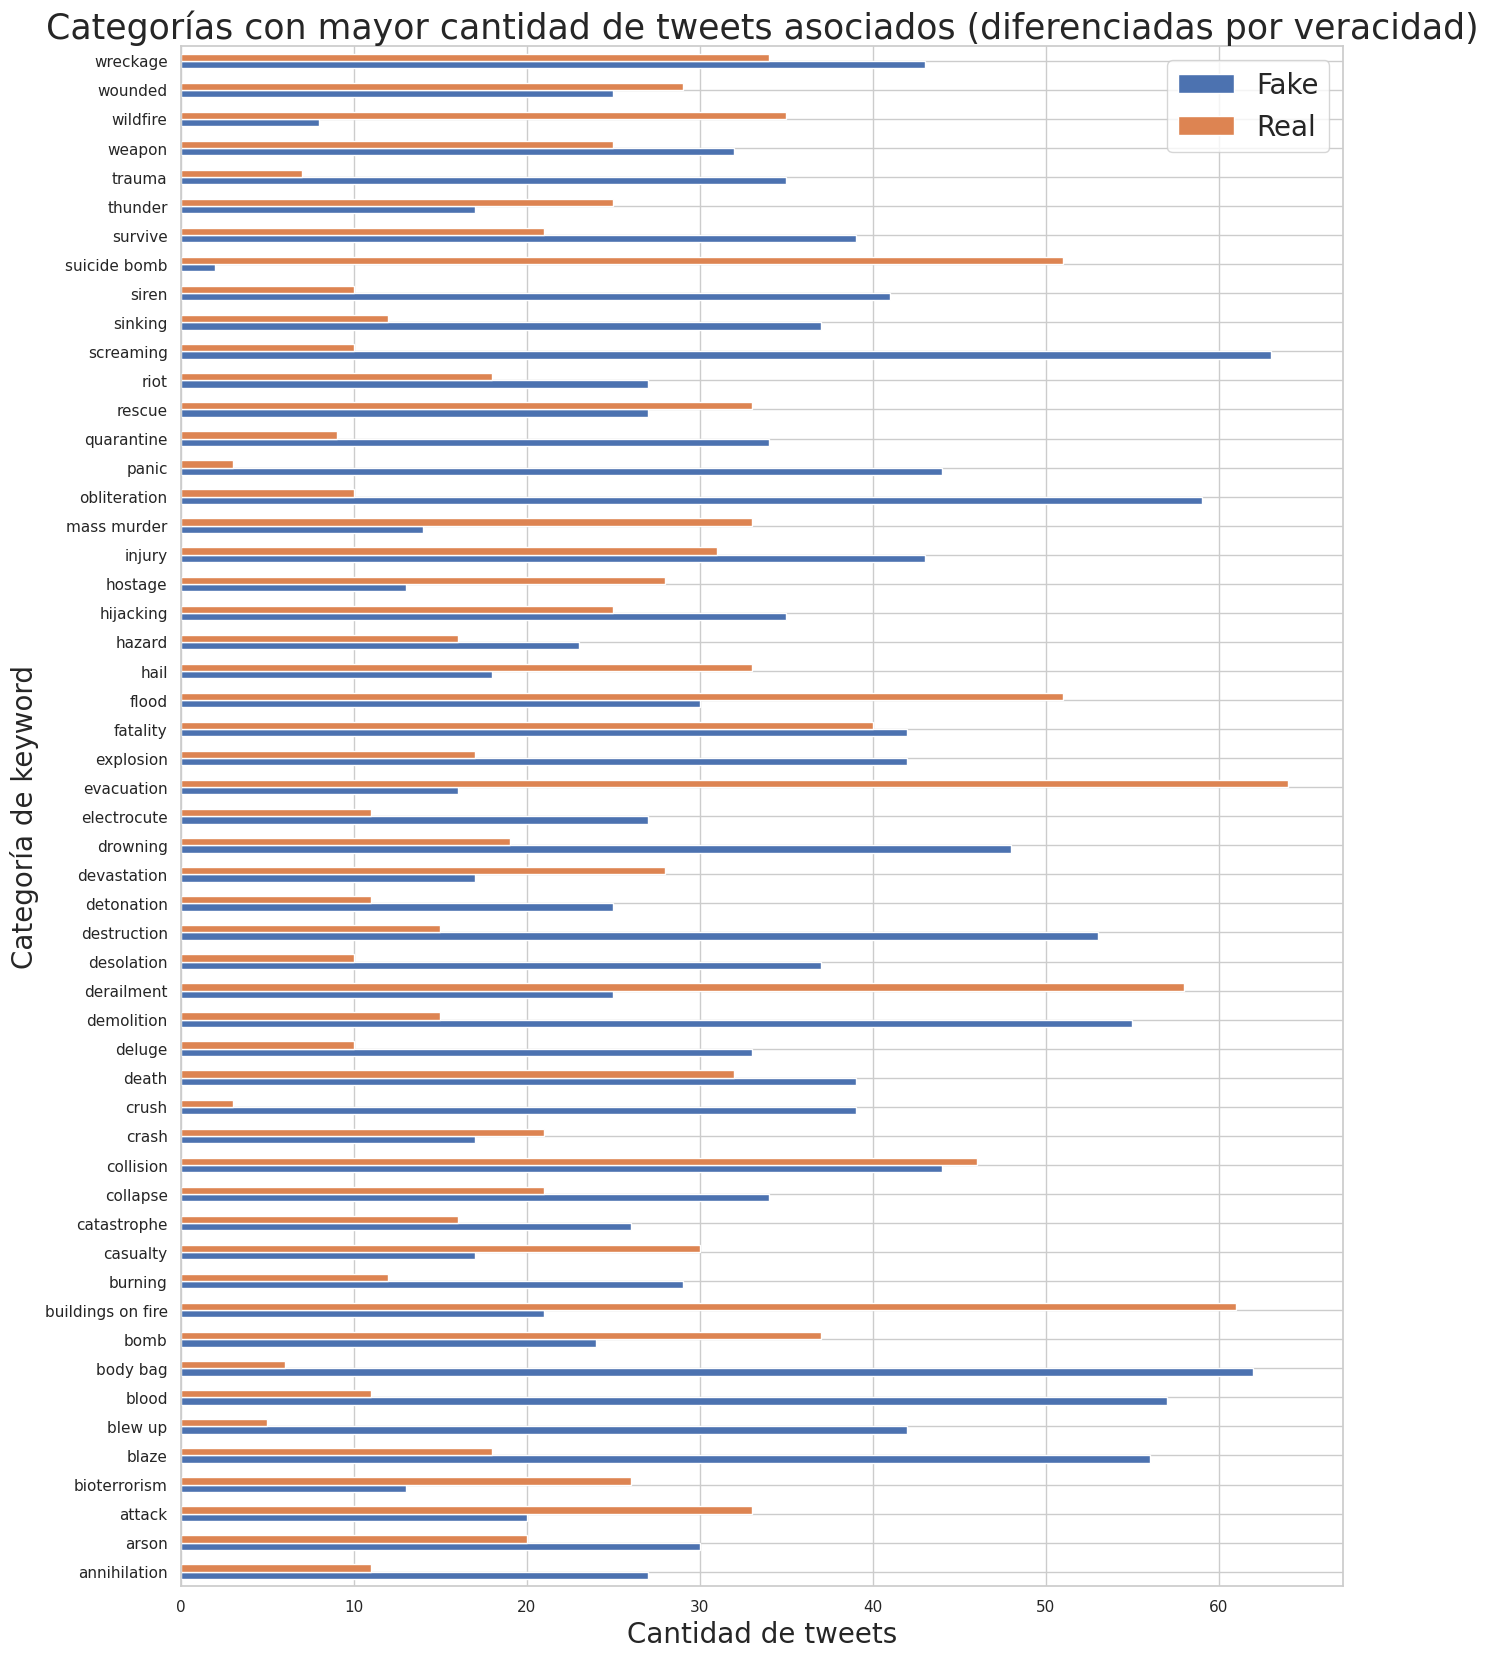

In [228]:
# Repitamos el análisis anterior pero distinguiendo según la veracidad de los tweets
main_keyword_categories_count_by_target = tweets[tweets['keyword_category'].isin\
                                                 (main_keyword_categories_count.index.to_list())]

main_keyword_categories_count_by_target = main_keyword_categories_count_by_target.groupby(['keyword_category', \
                                                                                           'target']).size()

main_keyword_categories_count_by_target = main_keyword_categories_count_by_target.unstack().reset_index()
main_keyword_categories_count_by_target = main_keyword_categories_count_by_target.rename(columns = \
                                                                                         {0:'fake', 1:'real'})

ax = plt.gca()
main_keyword_categories_count_by_target.plot(x='keyword_category', kind='barh', figsize=(15,20), ax=ax)
ax.set_xlabel('Cantidad de tweets', fontsize=20)
ax.set_ylabel('Categoría de keyword', fontsize=20)
ax.yticks = main_keyword_categories_count.index.to_list()
ax.set_title('Categorías con mayor cantidad de tweets asociados (diferenciadas por veracidad)', fontsize = 25)
ax.legend(['Fake', 'Real'], fontsize = 20)
plt.show()

In [229]:
# Generamos una nueva columna con la longitud del tweet (en cantidad de caracteres)
tweets['length'] = tweets['text'].str.len()
tweets['length'].describe()

count    5080.000000
mean      102.319882
std        33.405894
min         8.000000
25%        79.000000
50%       109.000000
75%       134.000000
max       152.000000
Name: length, dtype: float64

In [230]:
tweets_by_target = tweets.groupby('target').agg({'length': ['max', 'min', 'mean', 'count']})
tweets_by_target.columns = ['max_length', 'min_length', 'mean_length', 'tweet_count']
tweets_by_target.reset_index()
tweets_by_target

,max_length,min_length,mean_length,tweet_count
target,,,,
0,152,8,97.607836,2884
1,148,17,108.508197,2196


Text(0.5, 0, 'Veracidad del tweet')

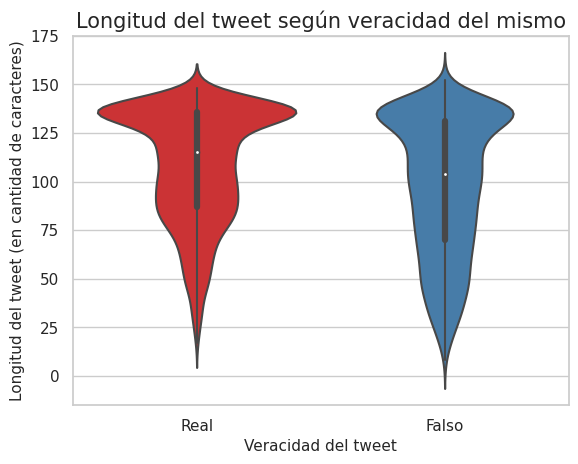

In [231]:
tweets['target'].replace(to_replace=[0, 1], value=['Falso','Real'], inplace=True)
plot = sns.violinplot(x='target', y='length', data=tweets, palette = 'Set1')
plot.set_title("Longitud del tweet según veracidad del mismo", fontsize=15)
plot.set_ylabel("Longitud del tweet (en cantidad de caracteres)", fontsize=11)
plot.set_xlabel("Veracidad del tweet", fontsize=11)
